## Problem Statement:

You are provided with a data set and you want to predict who will or will not survive the Titanic Disaster


## Import Statements


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Reading the Data


In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning the Data


<Axes: >

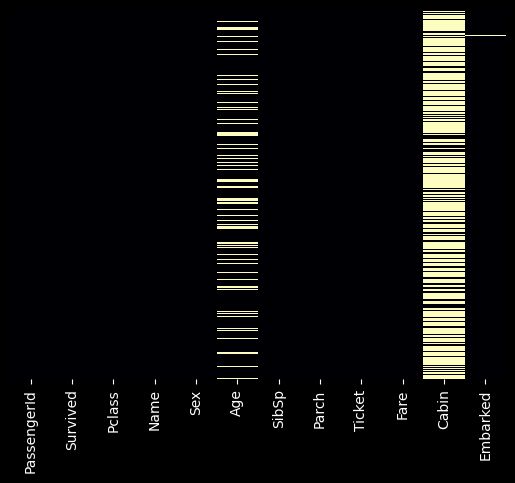

In [4]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="magma",
)

In [8]:
fig = px.box(
    title="Relation of Age with Passenger Class",
    data_frame=titanic,
    x="Pclass",
    y="Age",
    color="Pclass",
)

fig.update_layout(
    xaxis_title="Passenger Classes",
    legend_title_text="Passenger Class",
)

fig.show()

#### Filling the Age Column with the Mean of Passenger based upon their passenger class


In [10]:
def impute_age(cols: list) -> int:
    """This function would return the age based upon the passenger boarding class i.e Pclass"""

    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [11]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(impute_age, axis=1)

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4104\3707992956.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\MULTITECH\AppData\Local\Temp\ipykernel_4104\3707992956.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [14]:
titanic.dropna(inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<Axes: >

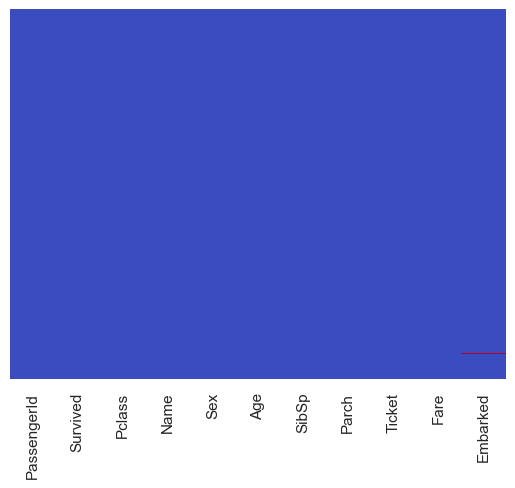

In [33]:
sns.heatmap(
    titanic.isnull(),
    yticklabels=False,
    cbar=False,
    cmap="coolwarm",
)

#### Droping the Cabin column because there are way to many NaN values


In [16]:
titanic.drop("Cabin", inplace=True, axis=1)

### Relation between the Survived and Age

#### Conclusion;

- Majority of the People are in the 25 - 35 age category


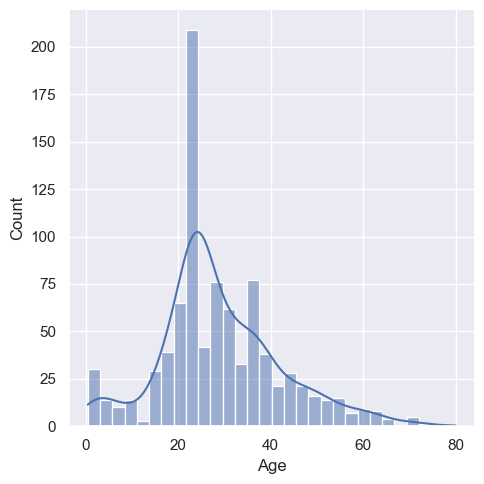

In [32]:
sns.set_theme("notebook")
sns.displot(
    data=titanic,
    x="Age",
    kde=True,
    bins=30,
)

plt.show()